In [1]:
import pandas as pd
import numpy as np 
import env
import seaborn as sns
import matplotlib.pyplot as plt
import os 

import warnings
warnings.filterwarnings("ignore")

from vega_datasets import data


In [2]:
solar_df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
solar_df.sample(15)

,Date,Consumption,Wind,Solar,Wind+Solar
2449,2012-09-15,1089.1200,123.985,67.424,191.409
2835,2013-10-06,1029.1710,14.973,38.165,53.138
2207,2012-01-17,1518.0740,76.430,31.036,107.466
1790,2010-11-26,1549.4090,10.233,NaN,NaN
1483,2010-01-23,1295.6870,81.398,NaN,NaN
922,2008-07-11,1352.1390,NaN,NaN,NaN
3323,2015-02-06,1620.5070,168.548,46.344,214.892
4298,2017-10-08,1150.3125,302.855,61.004,363.859
2063,2011-08-26,1350.7210,118.451,NaN,NaN
3202,2014-10-08,1478.6420,209.250,52.208,261.458


In [3]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [4]:
solar_df.shape

(4383, 5)

In [5]:
solar_df.rename(columns={"Wind+Solar": "Wind_and_Solar"})
solar_df.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


# Q1
### Convert date column to datetime format.

In [6]:
# Reassign the date column to be a datetime type
solar_df.Date = pd.to_datetime(solar_df.Date)

In [7]:
solar_df.info() # verity 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


# Q2
### Plot the distribution of each of your variables.

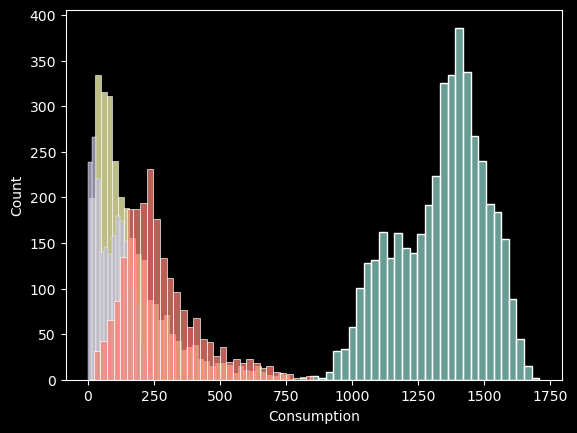

In [8]:
cols_to_plot = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

for i in cols_to_plot:
    sns.histplot(data=solar_df, x=i)

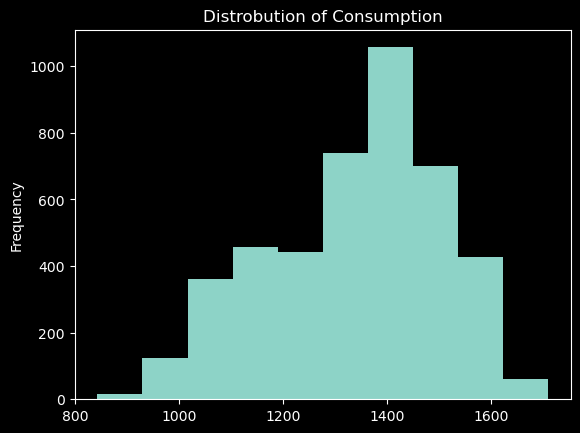

In [9]:
solar_df.Consumption.plot.hist()
plt.title('Distrobution of Consumption')
plt.show()

# Q3
### Set the index to be the datetime variable.

In [10]:
# Sort rows by the date and then set the index as that date

solar_df = solar_df.set_index("Date").sort_index()

In [11]:
solar_df.head() # verity 

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


# Q4
### Add a month and a year column to your dataframe.

In [12]:
solar_df['Year'] = solar_df.index.year # created columns using the index 
solar_df['Month'] = solar_df.index.month

# df['day'] = df.date.dt.day
# df['weekday'] = df.date.dt.day_name() 

solar_df.head() # verity 

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1
2006-01-02,1380.521,NaN,NaN,NaN,2006,1
2006-01-03,1442.533,NaN,NaN,NaN,2006,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1
2006-01-05,1477.131,NaN,NaN,NaN,2006,1


# Q5
### Fill any missing values.


In [13]:
solar_df.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
Year              0
Month             0
dtype: int64

In [14]:
solar_df.isnull().mean()

Consumption    0.000000
Wind           0.333790
Solar          0.500799
Wind+Solar     0.501027
Year           0.000000
Month          0.000000
dtype: float64

In [15]:
solar_df.groupby('Month')[['Wind', 'Solar']].sum()


,Wind,Solar
Month,,
1,51513.687,3639.946
2,46769.096,7453.945
3,43032.040,16022.938
4,35674.734,21552.288
5,32032.077,26033.920
6,27554.894,27462.509
7,27869.357,28038.890
8,27118.993,25812.815
9,30655.470,18584.506


In [16]:
solar_df.bfill()

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.18400,48.709,6.587,234.052,2006,1
2006-01-02,1380.52100,48.709,6.587,234.052,2006,1
2006-01-03,1442.53300,48.709,6.587,234.052,2006,1
2006-01-04,1457.21700,48.709,6.587,234.052,2006,1
2006-01-05,1477.13100,48.709,6.587,234.052,2006,1
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12


In [17]:
# solar_df.assign(
    # bfill_wind=lambda solar_df: solar_df.Wind.bfill(),
    # bfill_solar=lambda solar_df: solar_df.Solar.bfill()).head(15)

In [18]:
# solar_df.assign(bfill_solar_wind=lambda solar_df: solar_df.Wind+Solar.bfill()).head(15)

# Q6
### Make sure all the work that you have done above is reproducible. 

### That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def get_solar_data(solar_df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')) -> pd.DataFrame:
    solar_df.Date = pd.to_datetime(solar_df.Date)
    solar_df = solar_df.set_index("Date").sort_index()
    solar_df['Year'] = solar_df.index.year  
    solar_df['Month'] = solar_df.index.month
    solar_df.bfill()
    return(solar_df)

In [ ]:
solar_df = get_solar_data()
solar_df

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12


In [ ]:
solar_df.bfill()

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.18400,48.709,6.587,234.052,2006,1
2006-01-02,1380.52100,48.709,6.587,234.052,2006,1
2006-01-03,1442.53300,48.709,6.587,234.052,2006,1
2006-01-04,1457.21700,48.709,6.587,234.052,2006,1
2006-01-05,1477.13100,48.709,6.587,234.052,2006,1
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12


# Part 2

In [ ]:
def get_connection(db: str, user: str = env.user, host: str = env.host, password=env.password) -> str:
    return f"mysql+pymysql://{user}:{password}@{host}/{db}"

In [ ]:
def get_store_data(file_name="store.csv") -> pd.DataFrame:
    if os.path.isfile(file_name):
        return pd.read_csv(file_name)
    query = """SELECT *
            FROM items
            JOIN sales USING(item_id)
            JOIN stores USING(store_id)
            """
    connection = get_connection("tsa_item_demand")
    df = pd.read_sql(query, connection)
    df.to_csv(file_name, index=False)
    return df


In [ ]:
store_df = get_store_data()
store_df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


# Q1
### Convert date column to datetime format.


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  int64  
 3   item_upc12     913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_date      913000 non-null  object 
 9   sale_amount    913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


In [ ]:
store_df.sale_date = pd.to_datetime(store_df.sale_date)
store_df.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

# Q2

### Plot the distribution of sale_amount and item_price.


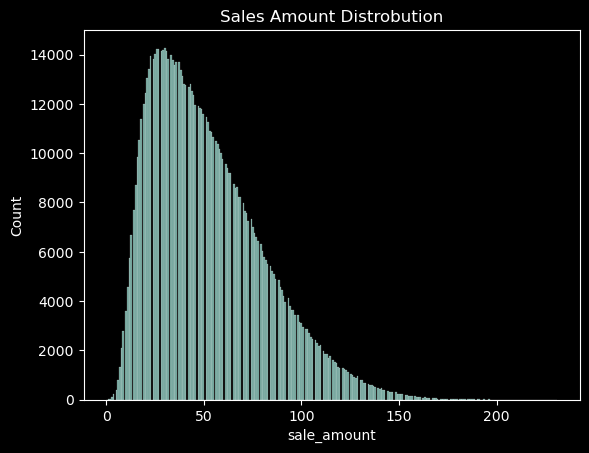

In [ ]:
sns.histplot(data=store_df, x="sale_amount")
plt.title("Sales Amount Distrobution")
plt.show()

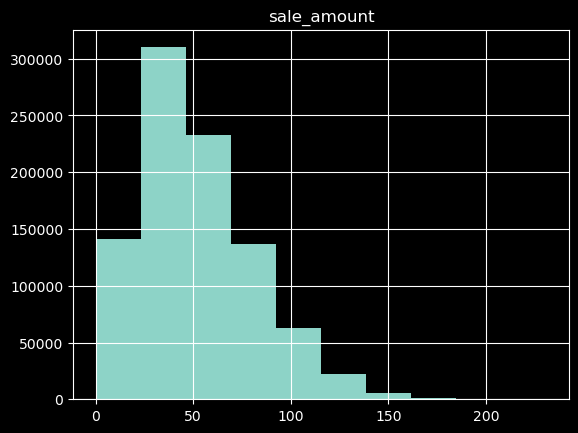

In [ ]:
store_df.sale_amount.hist()
plt.title('sale_amount')
plt.show()

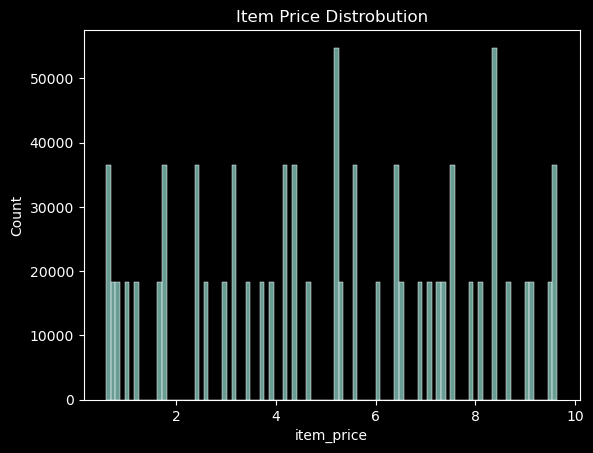

In [ ]:
sns.histplot(data=store_df, x="item_price")
plt.title("Item Price Distrobution")
plt.show()

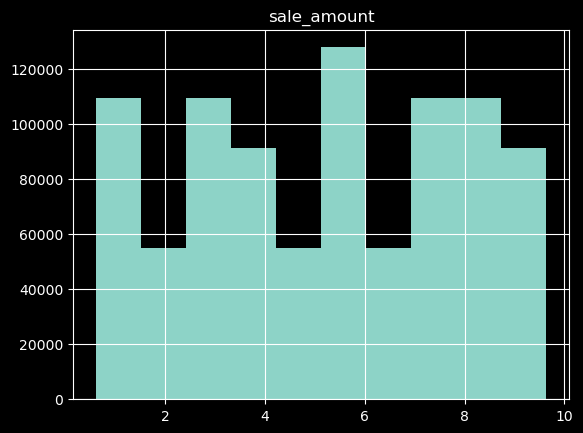

In [ ]:
store_df.item_price.hist()
plt.title('sale_amount')
plt.show()

# Q3
### Set the index to be the datetime variable.


In [ ]:
store_df = store_df.set_index('sale_date')
store_df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


# Q4
### Add a 'month' and 'day of week' column to your dataframe.


In [ ]:
store_df['month'] = store_df.index.strftime('%B')
store_df['day of the week'] = store_df.index.day_name()

In [ ]:
store_df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day of the week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Wednesday
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Thursday


# Q5
### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [ ]:
store_df['sales_total'] = store_df.sale_amount * store_df.item_price

In [ ]:
store_df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day of the week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Wednesday,9.24
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Thursday,11.76


# Q6 
### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prepare_store(df):
    # convert the sale date into a datetime
    df.sale_date = pd.to_datetime(df.sale_date)
    # set the index as the new datetime value
    df = df.set_index('sale_date')
    #extract the month value (name of month)
    df['month'] = df.index.strftime('%B')
    # extract the day of the week from the date
    df['day of the week'] = df.index.day_name()
    # calculate the total sales
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [ ]:
test = get_store_data()

In [ ]:
prepare_store(test)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day of the week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Wednesday,9.24
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Thursday,11.76
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Friday,10.92
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Saturday,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912996,63,8503 NW Military Hwy,78231,San Antonio,TX,December,Wednesday,327.60
2017-12-28,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912997,59,8503 NW Military Hwy,78231,San Antonio,TX,December,Thursday,306.80
2017-12-29,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912998,74,8503 NW Military Hwy,78231,San Antonio,TX,December,Friday,384.80
